<a href="https://colab.research.google.com/github/mhmenze/ML_projects/blob/main/Mobile_Price_Classifier_KNN_and_Neural_Network_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction - The Problem

**Index : AS2019459**

**Resources referenced: [Example Notebook in LMS](https://github.com/tgi25/home/blob/master/mlp_mnist_v1.ipynb)**

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,
Samsung, etc. He does not know how to estimate price of mobile phones his company manufactured. In
this competitive market you cannot simply assume things. To solve this problem he collected sales data
of mobile phones of various companies. Bob wants to find out some relation between features of mobile
phones (e.g., RAM, Internal Memory, etc.) and their selling prices.

## The Data

Dataset:


> 01. battery_power: Total energy a battery can store in one time measured in mAh
02. blue: Has Bluetooth or not
03. clock_speed: speed at which microprocessor executes instructions
04. dual_sim: Has dual sim support or not
05. fc: Front Camera mega pixels
06. four_g: Has 4G or not
07. int_memory: Internal Memory in Gigabytes
08. m_dep: Depth in cm
09. mobile_wt: Weight of mobile phone
10. n_cores: Number of cores of processor
11. pc: Primary Camera mega pixels
12. px_height: Pixel Resolution Height
13. px_width: Pixel Resolution Width
14. ram: Random Access Memory in Megabytes
15. sc_h: Screen Height of mobile in cm
16. sc_w: Screen Width of mobile in cm
17. talk_time: Longest time that a single battery charge will last
18. three_g: Has 3G or not
19. touch_screen: Has touch screen or not
20. wifi – Has wifi or not
21. price_range: four price ranges (0, 1, 2, 3)


**There are 2,000 records in the dataset. Use 80% and 20% of this data for training and testing
respectively.**

## The Task for the Model

Our goal is to construct and train an artificial neural network on 2000 data points of mobiles with their features and price ranges so that it may successfully identify others price ranges when presented. The data is split into 80% training and 20% testing set. We will use two different models here.

>

1.   Model 1 - K Nearest Neighbor method using SciKit Learn Python Package.
2.   Model 2 - Building multilayer Neural Network with Keras Python API with TensorFlow as the backend.

We will also be using matplotlib to plot the performance of the models.

## Prerequisite Python Modules

First, some packages need to be loaded into the Python environment.

In [197]:
import pandas as pd                  # To read the dataset
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from sklearn.model_selection import train_test_split   #Importing test train split function from the scikit learn python package

## Loading Training Data

To read the dataset, first we store the CSV file as a pandas Dataframe. This allows us to perform advanced operations on the data.

In [198]:
df = pd.read_csv("Mobile_Dataset.csv");           #Store data set as a pandas dataframe
df                                                #Display the dataframe

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Here we can see that there are 2000 rows of data, and 21 columns. Of them, the last column is for the desired classification classes. Hence we have 20 input features.

# Model 1 - Using KNN algorithm with SciKit Learn package

## Preprocessing


> First the data separated into different dataframes as inputs and targets, inputs - X1 and targets - y1



In [199]:
y1 = df["price_range"]     #Create a dataframe with the targets
y1

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

Here we can see the target column displayed above.

In [200]:
X1 = df.drop(["price_range"], axis=1)    #Create a dataframe with the inputs other than target "price_range"
X1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


Above we can see the features (or inputs) without the targets.

## Split Test and Train Data

> Then the data is split to testing and training data, with 20% for testing and 80% for training.



In [201]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.20, random_state=42)  #Splitting the data into 80% training and 20% testing

We can check the dimensions of the test train split to ensure that the split was successful. Here 80% of 2000 data should be 1600 for training and 400 for testing.

In [202]:
print("X1_train:", X1_train.shape)
print("X1_test:", X1_test.shape)
print("y1_train:", y1_train.shape)
print("y1_test:", y1_test.shape)

X1_train: (1600, 20)
X1_test: (400, 20)
y1_train: (1600,)
y1_test: (400,)


## Building the KNN model

Since we are trying to classify the data into a price range, this is a classification problem, not a regression problem. Hence we pick a Classifier to classify our data to price ranges 0,1,2 or 3. Here we will be using K nearest neighbor classifier.

In [203]:
from sklearn.neighbors import KNeighborsClassifier   #This is to import the classifier class from scikit learn package

knc = KNeighborsClassifier(n_neighbors=4)      #Creates a classifier object

knc.fit(X1_train, y1_train)           #Launch the training process

KNeighborsClassifier(n_neighbors=4)

## Training the Model

Here the training process is launched above.

In [204]:
knc.score(X1_train, y1_train)     #Evaluate Performance of training set

0.9475

## Evaluate Model

In [205]:
knc.score(X1_test, y1_test)       #Evaluate Performance of testing set

0.93

In [206]:
df["price_range_prediction"] = knc.predict(X1)   #Create a column for predicted values
df.sample(10 , random_state = 42)         #Random samples generated to test the model

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_range_prediction
1860,1646,0,2.5,0,3,1,25,0.6,200,2,...,1608,686,8,6,11,1,1,0,0,0
353,1182,0,0.5,0,7,1,8,0.5,138,8,...,986,2563,19,17,19,1,0,0,2,2
1333,1972,0,2.9,0,9,0,14,0.4,196,7,...,952,1316,8,1,8,1,1,0,1,1
905,989,1,2.0,0,4,0,17,0.2,166,3,...,1394,3892,18,7,19,1,1,0,3,3
1289,615,1,0.5,1,7,0,58,0.5,130,5,...,1958,1906,14,5,5,1,0,0,1,1
1273,627,1,1.6,1,3,1,12,0.2,131,7,...,819,2476,17,1,10,1,0,0,1,1
938,894,0,0.9,0,5,1,54,0.2,130,3,...,541,2829,11,5,13,1,0,1,2,2
1731,1066,0,3.0,1,6,1,5,0.5,167,5,...,1504,1044,8,7,11,1,0,0,0,0
65,616,0,1.9,1,13,1,44,0.8,81,3,...,1618,3366,18,8,13,1,1,0,3,3
1323,712,0,0.5,0,6,0,27,0.5,86,2,...,1309,2001,11,10,12,1,1,1,1,1


Hence we can see an accuracy of 93% on the testing set, which shows us that the model is quite successful in its predictions.

# Model 2 - Using Multilayered Neural network with Keras





> First the pandas dataframe has to be changed to an array using numpy package. This allows to process the data better for neural networks.



In [207]:
#Changing pandas dataframe to numpy array
X = df.iloc[:,:20].values
y = df.iloc[:,20:21].values

Then the data has to be normalized.
## Normalization

Normalization is a technique used to bring values to a common scale without distorting the differences between the values. This improves accuracy a lot. In our data set, we can observe some values have a scale of 100s or 1000s while others are much smaller. Ex, Ram, pixel width, etc are very large values sometimes while clock speed is less than 10 usually.

In [208]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## One Hot Encoding
We use this technique to convert integer classes to binary values. Here since we have 4 classes (0 to 3), we can get their binary representation by using one hot encoder. We use a sklearn function for this.

In [209]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()

## Splitting Test and Train Data

Here the data is split to 80% train and 20% test. And a random state is added to ensure that the splits generated are reproducible. Scikit-learn uses random permutations to generate the splits. The random state ensures that the random numbers are generated in the same order.

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)  #Splitting the data into 80% training and 20% testing

We can check the dimensions of the test train split to ensure that the split was successful. Here 80% of 2000 data should be 1600 for training and 400 for testing.

In [211]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (1600, 20)
X_test: (400, 20)
y_train: (1600, 4)
y_test: (400, 4)



80% of the data (2000 rows) is 1600 rows, hence we can see 1600 rows and 20 columns for the input train features and 400 rows and 20 columns for the input test features.

For the targets, since we have only one column, the column number is not displayed. And we have 1600 targets for the training data and 400 for testing.


## Building the Artificial Neural Network using Keras

First we import some required functions from tensorflow.

In [212]:
from keras.models import Sequential                       # Model type to be used
from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

### Model Architecture
Then we start creating the model. Here we will go with an architecture of 2 Hidden layers. 

1.   Input Layer      - 20
2.   1st Hidden Layer - 17 Neurons
3.   2nd Hidden Layer - 14 Neurons
4.   Output Layer     - 4 Neurons



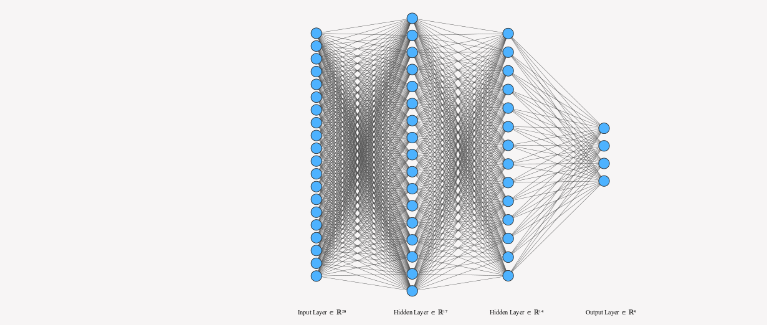

### Activation Functions

In [213]:
model = Sequential()      #create an empty sequential model

model.add(Dense(17, input_dim=20,  activation='relu'))
model.add(Dense(14, activation='relu'))

The activation function used for the hidden layers is ReLu function. Relu solves the gradient vanishing problem and stops the inactive neurons. Relu is also a faster activation function for most problems.

In [214]:
model.add(Dense(4))
model.add(Activation('softmax'))

For the output layer, we use "Softmax" activation function instead of Relu as Softmax is more suited for multi-classification problems.Softmax gives the output probabilities range. For multi-classification models softmax returns the probabilities of each class and the target class will have high probability.

In [215]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 17)                357       
                                                                 
 dense_22 (Dense)            (None, 14)                252       
                                                                 
 dense_23 (Dense)            (None, 4)                 60        
                                                                 
 activation_7 (Activation)   (None, 4)                 0         
                                                                 
Total params: 669
Trainable params: 669
Non-trainable params: 0
_________________________________________________________________


Above we can see a summary of the Model Architecture

### Optimizer and Loss function



1.   Optimizer - Adam
Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses. The results of the Adam optimizer are generally better than every other optimization algorithms, have faster computation time, and require fewer parameters for tuning.

2.   Loss Function - Categorical Cross Entropy
A loss function compares the target and predicted output values; measures how well the neural network models the training data. Categorical cross-entropy is used when true labels are one-hot encoded,


In [216]:
from tensorflow.keras import optimizers, callbacks
OPTIMIZER = optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = OPTIMIZER, loss = 'categorical_crossentropy', metrics = ['accuracy'])


### Regularization - Early Stopping
Early Stopping is a regularization technique for deep neural networks that stops training when parameter updates no longer begin to yield improves on a validation set.

Early stopping is implemented using Callbacks function. A callback is a function that is called repeatedly during a process (for example the training of a neural network) and which generally serves to validate or correct certain behaviors. In machine learning, we can use callbacks to define what happens before, during, or at the end of a training epoch.

In [217]:
ES = callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.001, verbose= VERBOSE, patience=10, mode = 'auto')

## Training the Model

After trying different batch sizes, a high accurate one was picked.

***Although a very high Epoch number is picked, due to Early stopping the model will stop training at the appropriate place.***

In [218]:
BATCH_SIZE = 64
EPOCHS = 1000
VERBOSE = 1

model_history = model.fit(x= X_train, y= y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, verbose = VERBOSE , validation_data = (X_test,y_test), callbacks = [ES])

Epoch 1/1000
25/25 [==============================] - 1s 12ms/step - loss: 1.4795 - accuracy: 0.2444 - val_loss: 1.4506 - val_accuracy: 0.2450
Epoch 2/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.3985 - accuracy: 0.2937 - val_loss: 1.3903 - val_accuracy: 0.2900
Epoch 3/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.3466 - accuracy: 0.3531 - val_loss: 1.3430 - val_accuracy: 0.3375
Epoch 4/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.2961 - accuracy: 0.3994 - val_loss: 1.2911 - val_accuracy: 0.3875
Epoch 5/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.2450 - accuracy: 0.4425 - val_loss: 1.2355 - val_accuracy: 0.4525
Epoch 6/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.1869 - accuracy: 0.4875 - val_loss: 1.1690 - val_accuracy: 0.4800
Epoch 7/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.1205 - accuracy: 0.5356 - val_loss: 1.0978 - val_accuracy: 0.5250
Epoch

## Evaluate the Model

We can test the accuracy of predicting one data from the testing data set as shown below.

In [219]:
model.evaluate(X_test, y_test)[1]

13/13 [==============================] - 0s 3ms/step - loss: 0.1491 - accuracy: 0.9350


0.9350000023841858

We could also evaluate the entire model's performance on the testing data as shown below

In [220]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

13/13 [==============================] - 0s 3ms/step


We can get the accuracy value as shown below.

In [221]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 93.5


### Visualizing the performance

We can use matplotlib to plot a accuracy against epoch plot to visualize the change in accuracy for test and train set of the model.


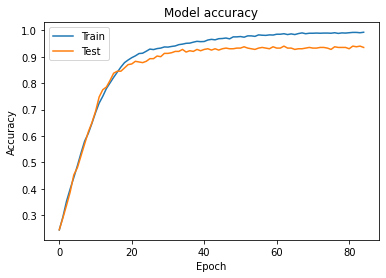

In [222]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

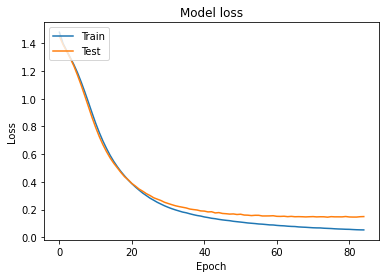

In [223]:
plt.plot(model_history.history['loss']) 
plt.plot(model_history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Hence we can see that the model has good speed of convergence. And also we have taken many steps to prevent overfitting problem, hence that is also under control. Early stopping is an important regularization technique to prevent overfitting, in addition to keeping the network simple and using appropriate optimizer.

# Conclusion
Hence we can see that both the models have very good accuracies (over 92%), and there is no big difference in accuracies. This is because the dataset is not extremely large and complex, hence a simple ML algorithm like KNN can also perform almost as good as a Neural Network. But in cases where the dataset is very complex with many features, then a neural network would outperform most algorithms easily.

# Saving

In [224]:
json_string = model.to_json() # as json 
open('mobile_price_classifier_AS2019459.json', 'w').write(json_string)
# save the weights in h5 format 
model.save_weights('mobile_price_classifier_AS2019459_wts.h5')